In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Data import

In [4]:
url = '/Users/z/Desktop/For work/For github/Credit Card Fraud/creditcard.csv'
df = pd.read_csv(url,header = 0)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 1. Data Preprocessing
1.1 Get a quick understanding of data types, missing values, uniqueness, and the fraud ratio.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Basically, they are all numeric data and especially 'Class' should be a dummy varibale indicating whether it is a fraud or not.

In [6]:
df.describe(include = 'all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Time and Amount should be rescaled.  
Although the scale itself won't influence the significance level, it do impact the volume of the coefficients and the robustness of the model we may use for analysis.  
Besides, time and amount are always two important patterns in financial analysis.

In [7]:
df['log_amount']= np.log1p(df['Amount']) #using log(1 + x) for some 0 amount transactions.
df['Time_scaled'] = df['Time'] / df['Time'].max()

Note that for here I just scale those two variable without using standardscaler() avoiding leakage of the info of the whole dataset for test part if I do the split later.

In [8]:
df.shape

(284807, 33)

V1–V28 are PCA-transformed, anonymized variables from real transactions.  
Variables: Time, Amount, and Class (target)  
### Goal: Detect fraudulent transactions based on past patterns. Try to figure out which patterns might help future detection?

1.2 Data wrangling

In [9]:
#Detect missing value in each column
missing = df.isnull()
for i in missing.columns:
    print(i,missing[i].value_counts())


Time Time
False    284807
Name: count, dtype: int64
V1 V1
False    284807
Name: count, dtype: int64
V2 V2
False    284807
Name: count, dtype: int64
V3 V3
False    284807
Name: count, dtype: int64
V4 V4
False    284807
Name: count, dtype: int64
V5 V5
False    284807
Name: count, dtype: int64
V6 V6
False    284807
Name: count, dtype: int64
V7 V7
False    284807
Name: count, dtype: int64
V8 V8
False    284807
Name: count, dtype: int64
V9 V9
False    284807
Name: count, dtype: int64
V10 V10
False    284807
Name: count, dtype: int64
V11 V11
False    284807
Name: count, dtype: int64
V12 V12
False    284807
Name: count, dtype: int64
V13 V13
False    284807
Name: count, dtype: int64
V14 V14
False    284807
Name: count, dtype: int64
V15 V15
False    284807
Name: count, dtype: int64
V16 V16
False    284807
Name: count, dtype: int64
V17 V17
False    284807
Name: count, dtype: int64
V18 V18
False    284807
Name: count, dtype: int64
V19 V19
False    284807
Name: count, dtype: int64
V20 V20
False   

Easy to see it is a perfectly balanced dataset

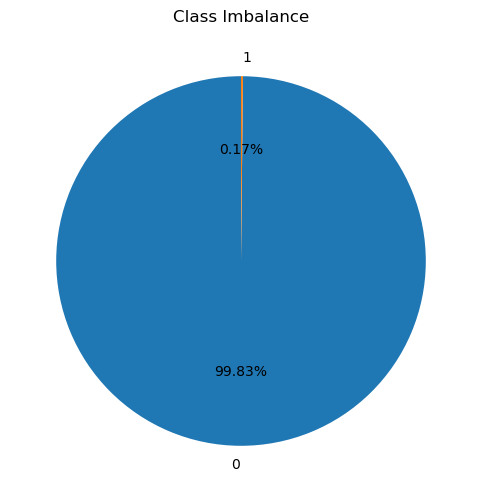

In [10]:
class_counts = df['Class'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(class_counts, 
        labels=class_counts.index,
        autopct='%1.2f%%', #show the percentage and round to 2 decimals
        startangle=90,)

plt.title("Class Imbalance")
plt.show()


The dataframe is extremely unbalanced.  
Justify that I may use F1-score or PR-AUC to evaluate my model later.

<Axes: xlabel='Class', ylabel='Amount'>

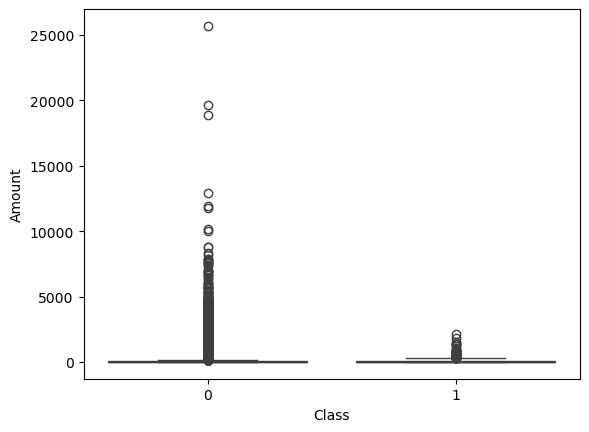

In [11]:
sns.boxplot(x = 'Class', y = 'Amount', data = df)

<Axes: xlabel='Class', ylabel='log_amount'>

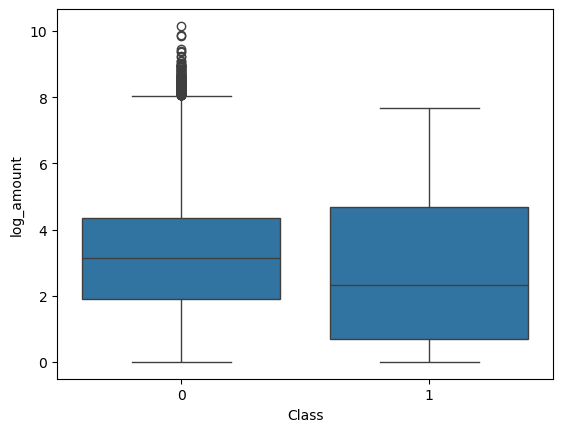

In [12]:
sns.boxplot(x = 'Class', y = 'log_amount', data = df)

Implications:  
Both classes are highly skewed with many small transactions.  
Fraudulent transactions (Class 1) generally have slightly lower median amounts, but also some extreme outliers.  
Suggests that fraud doesn’t always involve large sums — sometimes small, irregular payments trigger detection.  

(0.0, 2000.0)

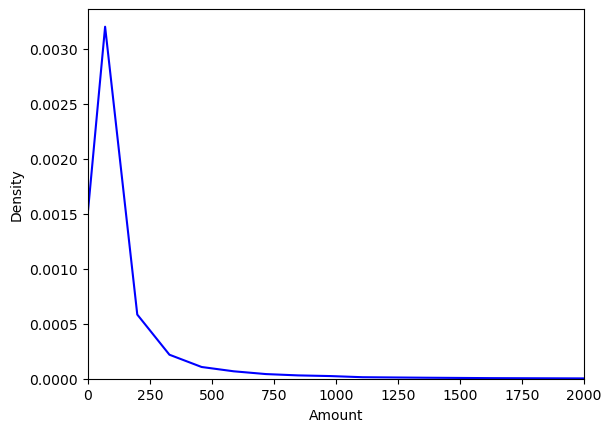

In [13]:
sns.kdeplot(df['Amount'], color = 'b', label = 'Distribution of transaction amount')
plt.xlim(0, 2000)

Most transactions are very small (under $250), dropping sharply afterward → typical consumer payment  pattern.  
The long tail beyond 1,000 still exists but represents very few cases.  

Together with your boxplot, it suggests:  
Fraud can happen across different amounts, but most activity (fraud or not) concentrates at small values.  
The few very large amounts are outliers, possibly high-risk but not frequent.

# 2.Exploratory Data Analysis (EDA)


Now that we’ve examined the class imbalance, we proceed to explore the data distribution, feature relationships, and potential patterns that may influence model performance.

###  2.1 Univariate Analysis

Plot the kde graph to see the patterns of features in two classes.

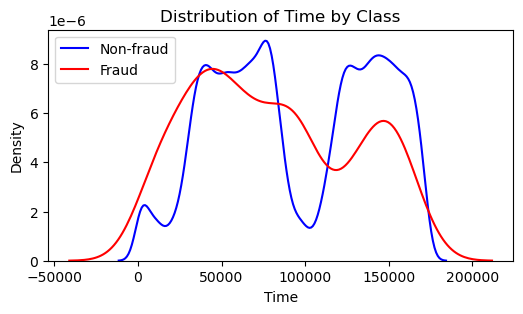

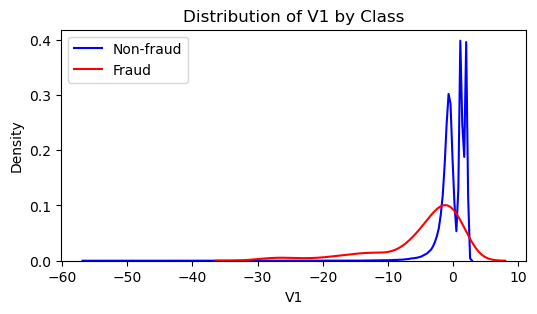

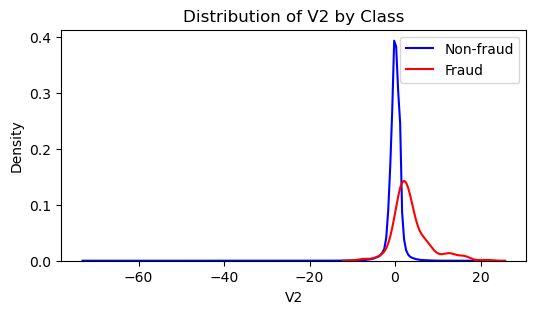

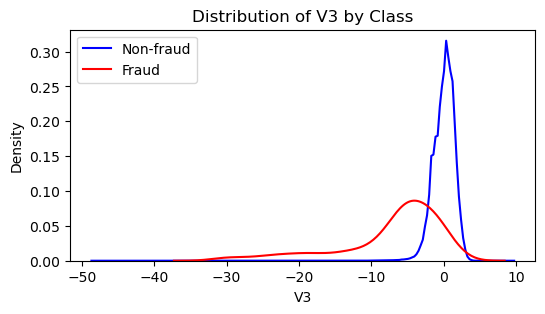

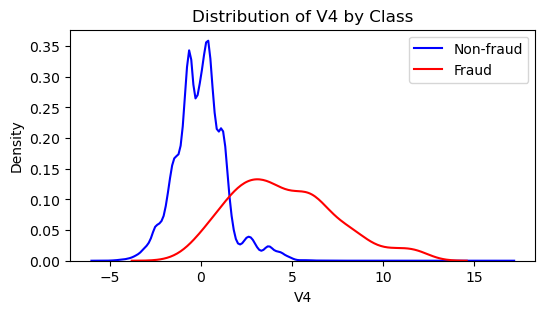

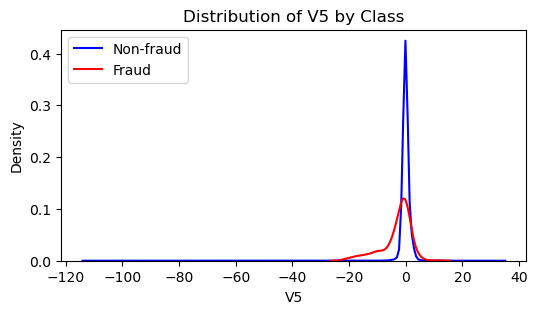

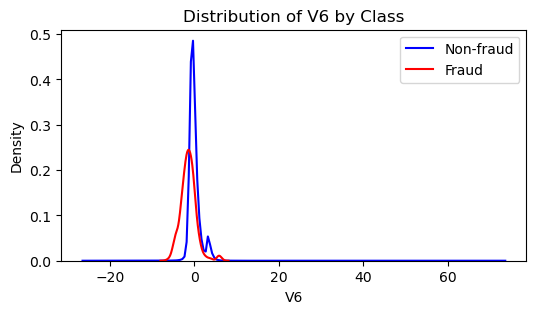

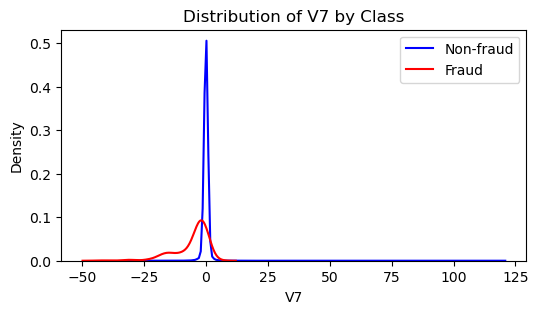

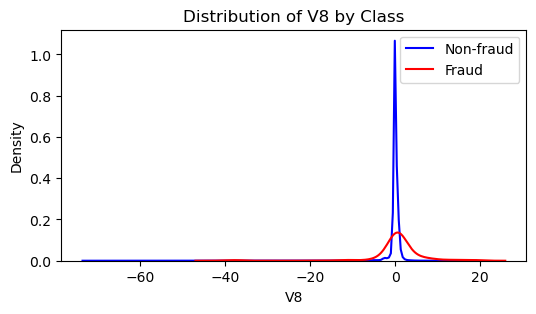

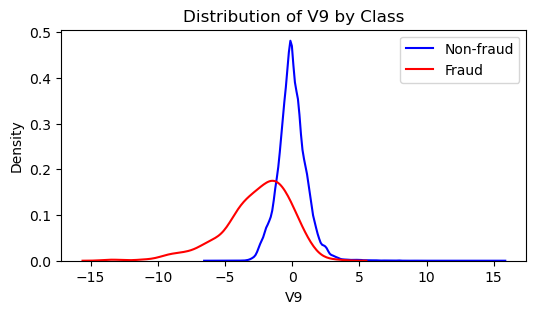

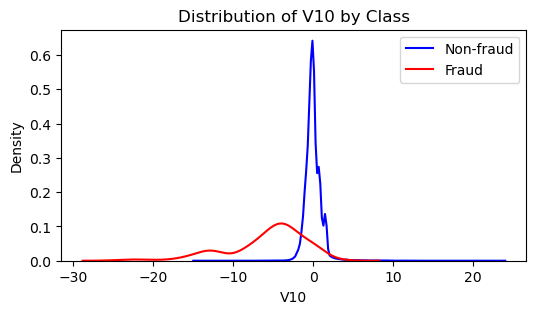

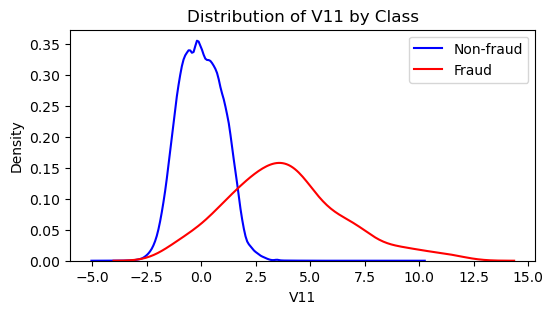

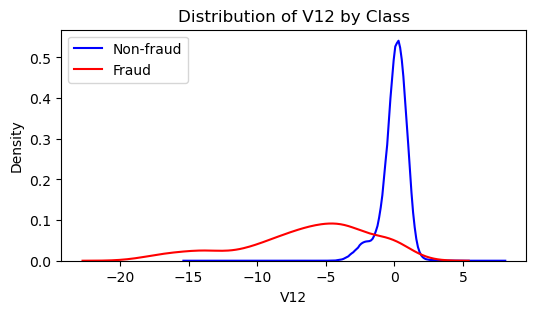

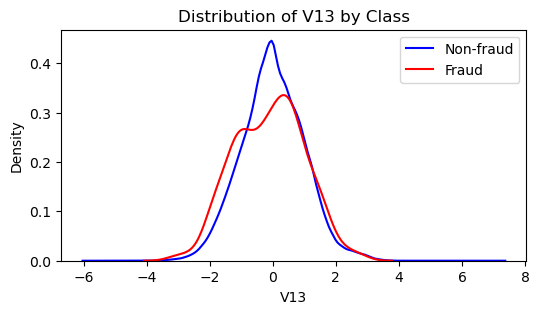

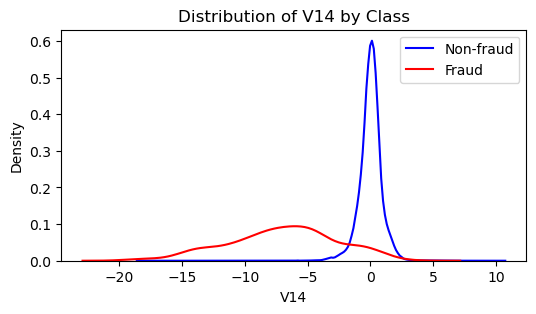

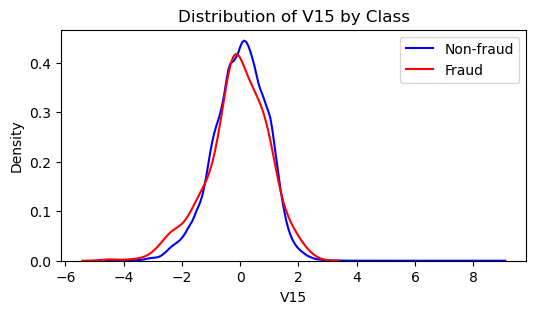

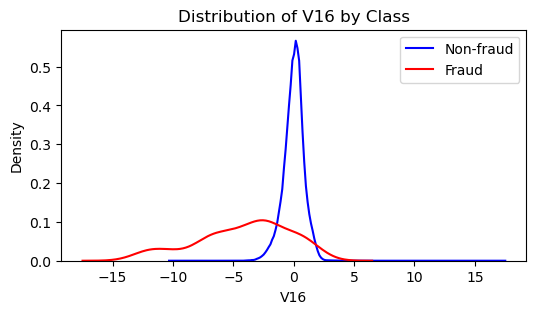

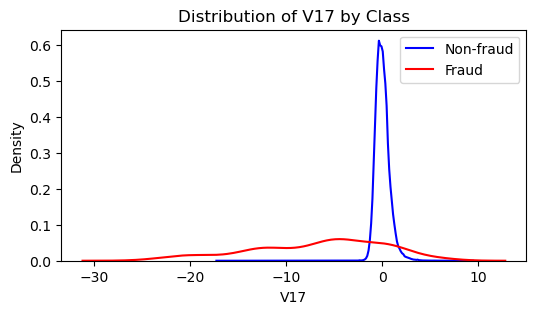

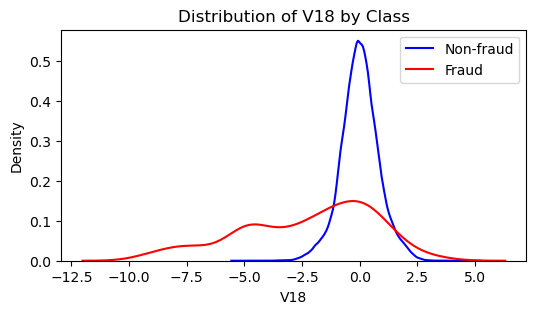

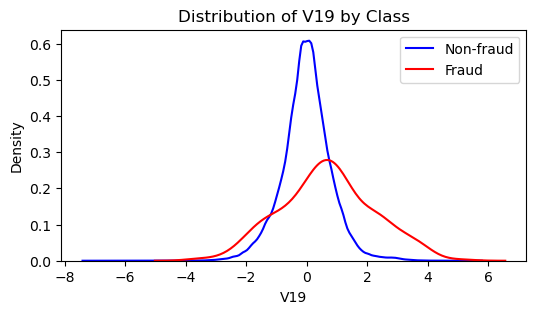

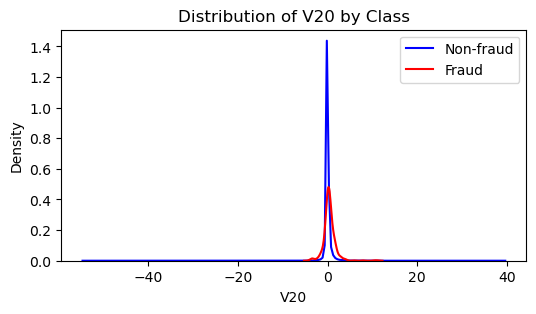

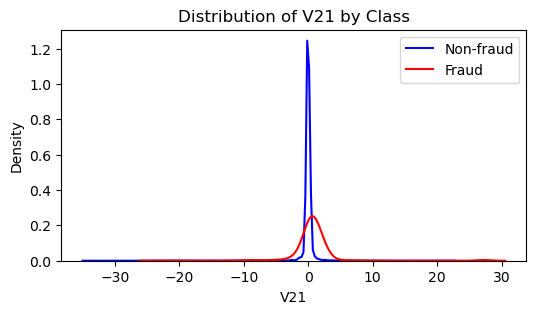

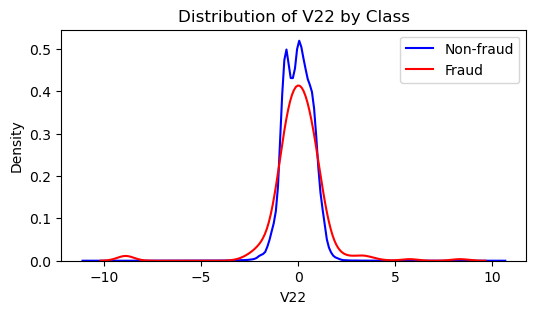

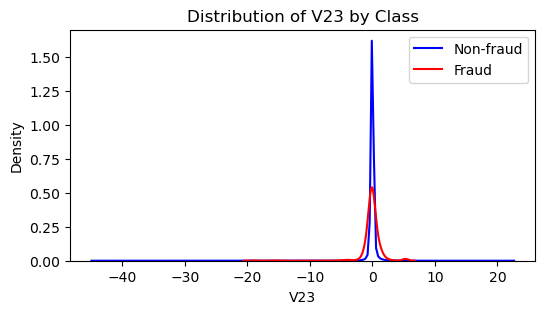

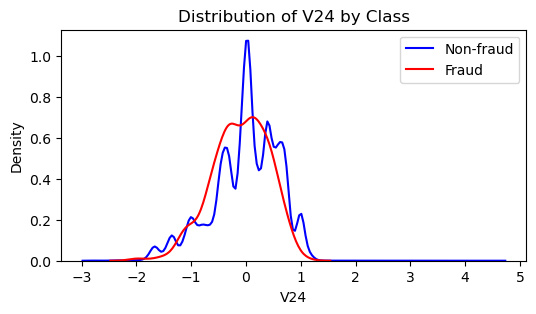

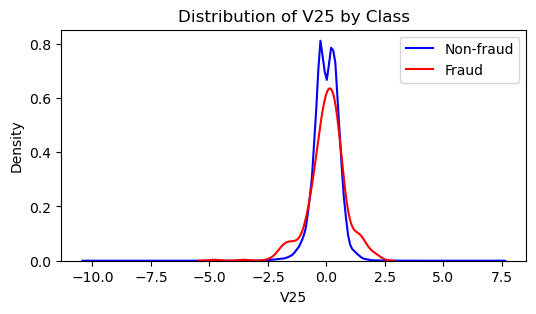

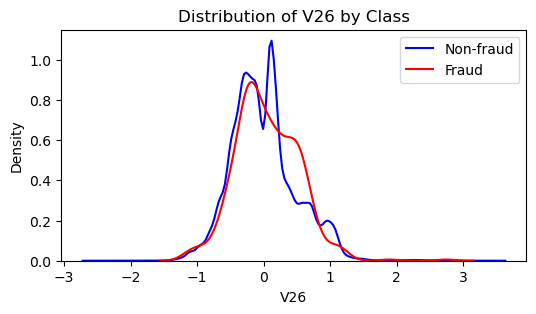

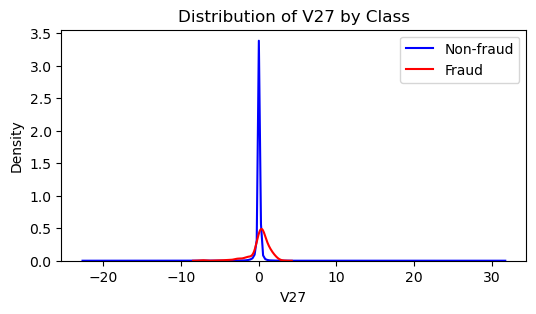

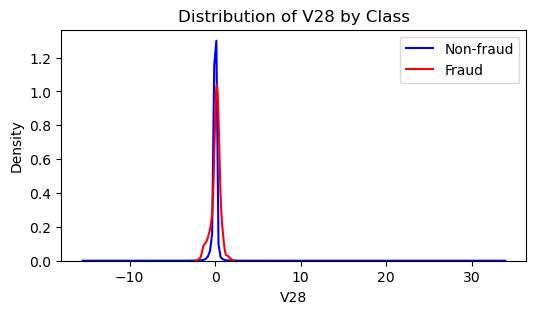

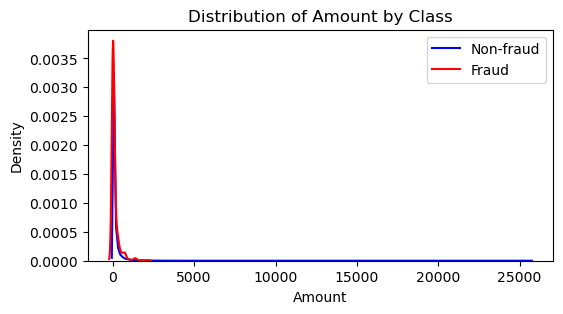

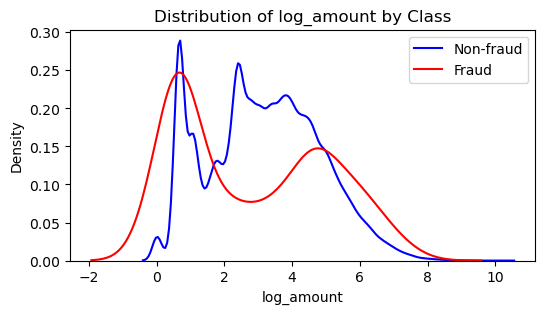

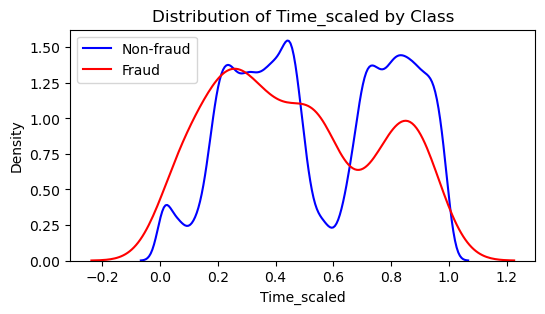

In [14]:
df1 = df[df['Class']==1]
df0 = df[df['Class']==0]
features = df.columns.drop('Class').tolist()
for col in features:
    plt.figure(figsize=(6,3))
    sns.kdeplot(df0[col], label='Non-fraud', color='blue')
    sns.kdeplot(df1[col], label='Fraud', color='red')
    plt.title(f'Distribution of {col} by Class')
    plt.legend()
    plt.show()

By visually comparing the KDE distributions for each PCA component, I observed that V4, V10, V12, V14, and V17 exhibit the most visible separation between fraudulent and non-fraudulent transactions.  
These features show shifted peaks or different tail behaviors, suggesting strong discriminative power.  
In contrast, components such as V13, V15, and V25–V28 show highly overlapping distributions, indicating limited predictive value.

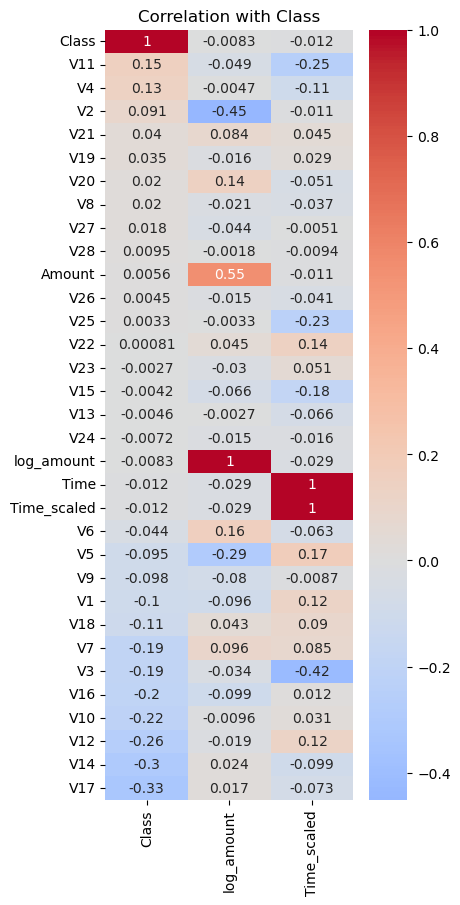

In [15]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(4, 10))
sns.heatmap(
    corr[['Class','log_amount','Time_scaled']].sort_values(by='Class', ascending=False),
    annot=True, cmap='coolwarm', center=0)
plt.title('Correlation with Class')
plt.show()

V11, V4 → because they have the strongest positive correlation  
V17, V14, V12, V10 → because they have strong negative correlation  

Those six variables are the most discriminative features, which match perfectly with what your KDE plots showed earlie

Although the variables Time and Amount show weak direct correlations with the fraud label, they are retained as contextual control features.
From an econometric standpoint, excluding them could introduce omitted-variable bias, since both capture important background conditions that may influence the observed relationships among other features.

•	Amount reflects transaction scale — frauds may occur in both low- and high-value transactions, but controlling for it helps isolate the effect of other behavioral variables.  
•	Time captures temporal patterns such as transaction frequency or time-of-day effects, which often correlate with irregular activity patterns.

Incorporating these variables improves model robustness and interpretability, serving a similar role to control variables in regression analysis — they help the model distinguish true predictive signals from background variation.

###  Conclusion: I will include V11, V4, V17, V14, V12, V10, time and amount in the model.

About the significance level:  
From an econometric perspective, discussing the statistical significance of individual features at this stage would have limited value.  
First, given the extremely large sample size in this dataset, even very small correlations tend to be statistically significant, making p-values less informative about practical importance.  
Second, testing features independently without controlling for other variables introduces omitted-variable bias — these univariate relationships cannot be interpreted as causal or even stable predictors once other factors are considered.  

Therefore, the exploratory analysis for univariate here focuses on practical discriminative power rather than statistical significance.  
Features are evaluated based on their magnitude of correlation with the fraud label and their distributional separation between classes, as observed in the KDE plots.  
This approach aligns more closely with data science practice, where interpretability and predictive contribution are prioritized over formal significance testing in early-stage exploration.  

### 2.2 Multivariate Regression

Import some new modules here

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold,train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, confusion_matrix

Step 1: Split the dataset

In [17]:
lr = LogisticRegression()
X = df[['V4','V10','V11','V12','V14','V17','Amount','Time']]
y = df['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=42)#Keep the training and testing data as the same for further evaluation.
print(f'''number of test samples: {X_test.shape[0]}
number of training samples: {X_train.shape[0]}''')

number of test samples: 227846
number of training samples: 56961


Step 2: Create a pipeline for Logistic Regression.  


Create pipeline

Best C: 0.004641588833612777
Test ROC-AUC: 0.9700472696712141
Train PR-AUC: 0.7541485975899174
Test PR-AUC : 0.7377721036876028
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227459
           1       0.88      0.49      0.63       387

    accuracy                           1.00    227846
   macro avg       0.94      0.75      0.81    227846
weighted avg       1.00      1.00      1.00    227846

[[227432     27]
 [   197    190]]


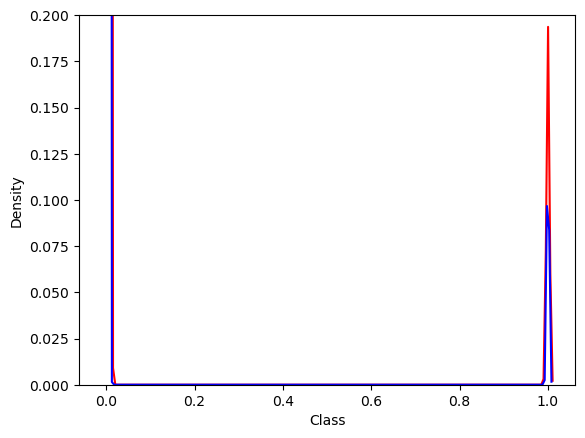

In [18]:
input = [('scale',StandardScaler()),('lr',LogisticRegression(max_iter=1000, penalty='l2'))]
pipe = Pipeline(input)


##Find best hyperparameter to avoid overfitting using GridSearch
params = {'lr__C': list(np.logspace(-3, 3, 10))}
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42) #keep the same data division for further comparison with ohter models
#stratifiedkfold guarantees the ratios of fraud and non-fraud are equal in every fold.
#The dataframe originally has a timing order so shuffling all rows randomly before splittng is necessary in case of absorbing the influence of time double times 
Grid = GridSearchCV(pipe, params,cv=cv,scoring='roc_auc', refit=True)

Grid.fit(X_train,y_train)
best_model = Grid.best_estimator_
print("Best C:", Grid.best_params_['lr__C'])

## Train and test metrics
y_hat_train = best_model.predict(X_train)
y_hat_test  = best_model.predict(X_test)
y_proba_train = best_model.predict_proba(X_train)[:,1]
y_proba_test = best_model.predict_proba(X_test)[:, 1] 
#proba predicts the fraud probability. I only select the fraud (Class=1) column only

sns. kdeplot(y_test, color="r", label="Actual Value")
sns. kdeplot(y_hat_test, color="b", label="Fitted Value")
plt.ylim(0,0.2)


#check for overfitting 
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba_test))
print("Train PR-AUC:", average_precision_score(y_train, y_proba_train))
print("Test PR-AUC :", average_precision_score(y_test, y_proba_test))
print(classification_report(y_test, y_hat_test))
print(confusion_matrix(y_test, y_hat_test))

### Model Evaluation Summary

- **Best regularization strength (C):** 0.0046  
- **Test ROC-AUC:** 0.97 — Excellent discrimination ability between fraud and non-fraud transactions.  
- **Train ROC-AUC:** 0.98 — Very close to test ROC-AUC, suggesting no severe overfitting.  
- **PR-AUC:** 0.74 (train) vs. 0.73 (test) — Consistent precision-recall performance despite data imbalance.  

**Interpretation:**  
The logistic regression model with L2 regularization performs robustly on both train and test sets.  
It maintains a strong ROC-AUC while keeping precision and recall balanced (f1 = 0.63 for the fraud class).  
Although recall (0.49) indicates some missed fraud cases, the model effectively avoids overfitting and can be used as a reliable baseline for fraud detection.

However, logistic regression assumes linear separability and may struggle to capture more complex, non-linear patterns that often exist in real-world fraud behavior.

To further improve the model, the next steps will include:

1. **Testing tree-based ensemble models** such as **Random Forest** and **XGBoost**, which can automatically capture nonlinear relationships and variable interactions.
2. **Addressing class imbalance** through resampling strategies:
   - **SMOTE (Synthetic Minority Oversampling Technique)**
   - **Random Under-sampling**
   - **Class weighting** within the model
3. **Comparing performance metrics** (especially F1-score and PR-AUC) across models to evaluate real improvement over the logistic baseline.

These steps will help assess whether advanced models truly outperform the logistic regression in recall and overall fraud detection capability.

# 3.Advanced Modeling: Tree-based & Resampling Experiments

### Part 1 — Tree-based models (Random Forest & XGBoost)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report

Random Forest

In [20]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
}
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='roc_auc', n_jobs=-1)
rf_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)
y_proba_rf = rf_best.predict_proba(X_test)[:, 1]

print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("Random Forest PR-AUC:", average_precision_score(y_test, y_proba_rf))
print("Random Forest F1:", f1_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest ROC-AUC: 0.9707732374587132
Random Forest PR-AUC: 0.7780853947276065
Random Forest F1: 0.7627329192546584
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227459
           1       0.73      0.79      0.76       387

    accuracy                           1.00    227846
   macro avg       0.87      0.90      0.88    227846
weighted avg       1.00      1.00      1.00    227846



XGBoost

In [21]:
xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train)  # handle imbalance
)

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
}

xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring='roc_auc', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

xgb_best = xgb_grid.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)
y_proba_xgb = xgb_best.predict_proba(X_test)[:, 1]

print("XGBoost ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))
print("XGBoost PR-AUC:", average_precision_score(y_test, y_proba_xgb))
print("XGBoost F1:", f1_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost ROC-AUC: 0.9605456850769243
XGBoost PR-AUC: 0.8033577998411701
XGBoost F1: 0.7144456886898096
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227459
           1       0.63      0.82      0.71       387

    accuracy                           1.00    227846
   macro avg       0.82      0.91      0.86    227846
weighted avg       1.00      1.00      1.00    227846



### Part 2 — Handling Imbalance (using SMOTE & undersampling)

In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

Option 1 — SMOTE (oversampling)

In [28]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)
print("SMOTE new class distribution:", y_res.value_counts())


Grid.fit(X_res, y_res)
lr_smote = Grid.best_estimator_
y_proba_smote = lr_smote.predict_proba(X_test)[:, 1]
print("Logistic (SMOTE) PR-AUC:", average_precision_score(y_test, y_proba_smote))

SMOTE new class distribution: Class
0    56856
1    56856
Name: count, dtype: int64
Logistic (SMOTE) PR-AUC: 0.7171452770330506


Option 2 — Random Under-sampling

In [29]:
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train, y_train)
print("Under-sampled class distribution:", y_under.value_counts())

Grid.fit(X_under, y_under)
lr_under=Grid.best_estimator_
y_proba_under = lr_under.predict_proba(X_test)[:, 1]
print("Logistic (Under-sampling) PR-AUC:", average_precision_score(y_test, y_proba_under))

Under-sampled class distribution: Class
0    105
1    105
Name: count, dtype: int64
Logistic (Under-sampling) PR-AUC: 0.7027722355471643


# 4.Compare all models visually

In [30]:
results = pd.DataFrame({
    'Model': ['Logistic (Baseline)', 'Random Forest', 'XGBoost', 'Logistic + SMOTE', 'Logistic + Undersample'],
    'ROC-AUC': [
        0.9700,  # from baseline
        roc_auc_score(y_test, y_proba_rf),
        roc_auc_score(y_test, y_proba_xgb),
        roc_auc_score(y_test, y_proba_smote),
        roc_auc_score(y_test, y_proba_under)
    ],
    'PR-AUC': [
        0.7377,
        average_precision_score(y_test, y_proba_rf),
        average_precision_score(y_test, y_proba_xgb),
        average_precision_score(y_test, y_proba_smote),
        average_precision_score(y_test, y_proba_under)
    ]
})

print(results.sort_values('PR-AUC', ascending=False))
#In highly imbalanced datasets such as credit card fraud detection,PR-AUC is preferred because it focuses on the model’s ability to correctly identify the minority (fraud) class.

                    Model   ROC-AUC    PR-AUC
2                 XGBoost  0.960546  0.803358
1           Random Forest  0.970773  0.778085
0     Logistic (Baseline)  0.970000  0.737700
3        Logistic + SMOTE  0.969880  0.717145
4  Logistic + Undersample  0.972809  0.702772
